# Heart Disease Prediction

World Health Organization has estimated 12 million deaths occur worldwide, every year due to Heart diseases. Half the deaths in the United States and other developed countries are due to cardio vascular diseases.



### Content
#### Column Descriptions:
* `id `(Unique id for each patient)
* `age` (Age of the patient in years)
* `origin` (place of study)
* `sex` (Male/Female)
* `cp` chest pain type
  1. typical angina.
  2. atypical angina.
  3. non-anginal.
  4. asymptomatic.
* `trestbps` resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))
* `chol` (serum cholesterol in mg/dl)
* `fbs` (if fasting blood sugar > 120 mg/dl)
* `restecg` (resting electrocardiographic results)
* `-- Values:` [normal, stt abnormality, lv hypertrophy]
* `thalach:` maximum heart rate achieved
* `exang:` exercise-induced angina (True/ False)
* `oldpeak:` ST depression induced by exercise relative to rest
* `slope:` the slope of the peak exercise ST segment
* `ca:` number of major vessels (0-3) colored by fluoroscopy
* `thal:`[normal; fixed defect; reversible defect]
* `num:` the predicted attribute



# Import Libraries


In [1]:
# import libraries

# 1. to handle the data
import pandas as pd
import numpy as np

# 2. To Viusalize the data
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from yellowbrick.cluster import KElbowVisualizer
from matplotlib.colors import ListedColormap

# 3. To preprocess the data
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.impute import SimpleImputer, KNNImputer

# 4. import Iterative imputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# 5. Machine Learning
from sklearn.model_selection import train_test_split,GridSearchCV, cross_val_score

# 6. For Classification task.
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,ExtraTreesClassifier,RandomForestRegressor
from xgboost import XGBClassifier

# 7. Metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 8. Ignore warnings
import warnings
warnings.filterwarnings('ignore')


# Load the Dataset

In [2]:

df = pd.read_csv("/content/heart_disease_uci.csv")

# print the first 5 rows of the dataframe
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


# Exploratory Data Analysis (EDA)
### Explore Each Column

In [4]:
# Exploring the data type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [5]:
# Checking the data shape
df.shape

(920, 16)

In [6]:
# Id column
df['id'].min(), df['id'].max()

(1, 920)

In [7]:
# age column
df['age'].min(), df['age'].max()

(28, 77)

## Visualizations

In [8]:
# lets summerize the age column
df['age'].describe()

,age
count,920.000000
mean,53.510870
std,9.424685
min,28.000000
25%,47.000000
50%,54.000000
75%,60.000000
max,77.000000


<Axes: xlabel='age', ylabel='Count'>

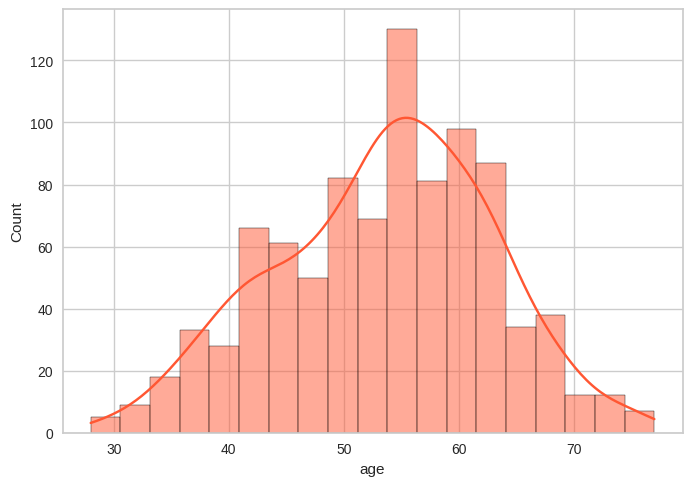

In [9]:
import seaborn as sns

# Define custom colors
custom_colors = ["#FF5733", "#3366FF", "#33FF57"]  # Example colors, you can adjust as needed

# Plot the histogram with custom colors
sns.histplot(df['age'], kde=True, color="#FF5733", palette=custom_colors)


Mean 53.51086956521739
Median 54.0
Mode 0    54
Name: age, dtype: int64


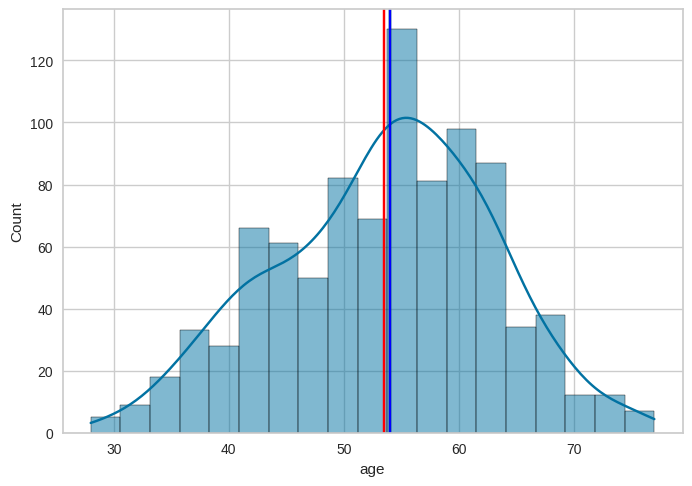

In [10]:
# Plot the mean, Median and mode of age column using sns
sns.histplot(df['age'], kde=True)
plt.axvline(df['age'].mean(), color='Red')
plt.axvline(df['age'].median(), color= 'Green')
plt.axvline(df['age'].mode()[0], color='Blue')

# print the value of mean, median and mode of age column
print('Mean', df['age'].mean())
print('Median', df['age'].median())
print('Mode', df['age'].mode())


In [11]:
# plot the histogram of age column using plotly and coloring this by sex

fig = px.histogram(data_frame=df, x='age', color= 'sex')
fig.show()

In [12]:
# Find the values of sex column
df['sex'].value_counts()

,count
sex,
Male,726
Female,194


In [13]:
# calculating the percentage fo male and female value counts in the data

male_count = 726
female_count = 194

total_count = male_count + female_count

# calculate percentages
male_percentage = (male_count/total_count)*100
female_percentages = (female_count/total_count)*100

# display the results
print(f'Male percentage i the data: {male_percentage:.2f}%')
print(f'Female percentage in the data : {female_percentages:.2f}%')

# Difference
difference_percentage = ((male_count - female_count)/female_count) * 100
print(f'Males are {difference_percentage:.2f}% more than female in the data.')


Male percentage i the data: 78.91%
Female percentage in the data : 21.09%
Males are 274.23% more than female in the data.


In [14]:
# Find the values count of age column grouping by sex column
df.groupby('sex')['age'].value_counts()

sex     age
Female  54     15
        51     11
        62     10
        43      9
        48      9
               ..
Male    77      2
        28      1
        31      1
        33      1
        76      1
Name: count, Length: 91, dtype: int64

#### Exploring the dataset column

In [15]:
# find the unique values in the dataset column
df['dataset'].value_counts()

,count
dataset,
Cleveland,304
Hungary,293
VA Long Beach,200
Switzerland,123


In [16]:
# plot the countplot of dataset column
fig =px.bar(df, x='dataset', color='sex')
fig.show()

# print the values of dataset column groupes by sex
print (df.groupby('sex')['dataset'].value_counts())

sex     dataset      
Female  Cleveland         97
        Hungary           81
        Switzerland       10
        VA Long Beach      6
Male    Hungary          212
        Cleveland        207
        VA Long Beach    194
        Switzerland      113
Name: count, dtype: int64


In [17]:
# make a plot of age column using plotly and coloring by dataset

fig = px.histogram(data_frame=df, x='age', color= 'dataset')
fig.show()

# print the mean median and mode of age column grouped by dataset column
print("___________________________________________________________")
print ("Mean of the dataset: ",df.groupby('dataset')['age'].mean())
print("___________________________________________________________")
print ("Median of the dataset: ",df.groupby('dataset')['age'].median())
print("___________________________________________________________")
print ("Mode of the dataset: ",df.groupby('dataset')['age'].agg(pd.Series.mode))
print("___________________________________________________________")

___________________________________________________________
Mean of the dataset:  dataset
Cleveland        54.351974
Hungary          47.894198
Switzerland      55.317073
VA Long Beach    59.350000
Name: age, dtype: float64
___________________________________________________________
Median of the dataset:  dataset
Cleveland        55.5
Hungary          49.0
Switzerland      56.0
VA Long Beach    60.0
Name: age, dtype: float64
___________________________________________________________
Mode of the dataset:  dataset
Cleveland              58
Hungary                54
Switzerland            61
VA Long Beach    [62, 63]
Name: age, dtype: object
___________________________________________________________


## Exploring CP (Chest Pain) column

In [18]:
# value count of cp column
df['cp'].value_counts()

,count
cp,
asymptomatic,496
non-anginal,204
atypical angina,174
typical angina,46


<Axes: xlabel='cp', ylabel='count'>

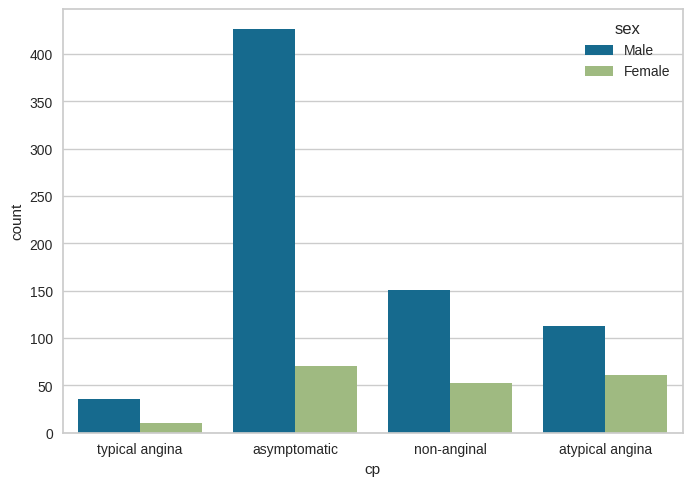

In [19]:
# count plot of cp column by sex column
sns.countplot(df, x='cp', hue= 'sex')

<Axes: xlabel='cp', ylabel='count'>

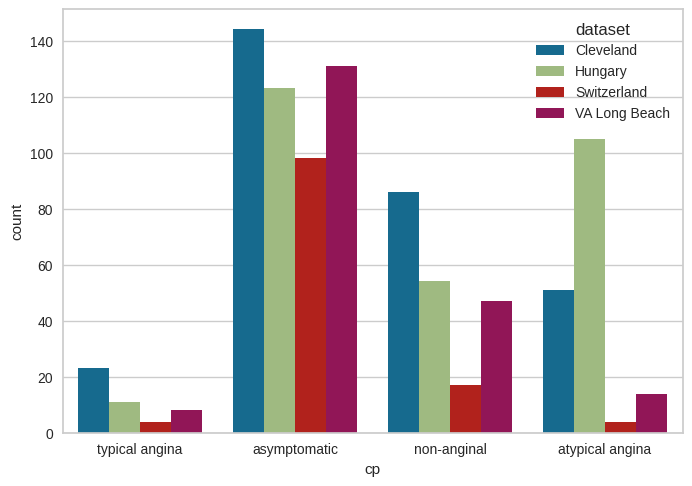

In [20]:
# count plot of cp column by dataset column
sns.countplot(df,x='cp',hue='dataset')

In [21]:
# Draw the plot of age column group by cp column

fig = px.histogram(data_frame=df, x='age', color='cp')
fig.show()

### explore the trestbps (resting blood pressure) column:



In [22]:
# lets summerize the trestbps column
df['trestbps'].describe()

,trestbps
count,861.000000
mean,132.132404
std,19.066070
min,0.000000
25%,120.000000
50%,130.000000
75%,140.000000
max,200.000000


### **Handling missing values in trestbps column**

There are some missing values becuase total values is 920 but here we have 861

In [23]:
# Dealing with Missing values in trestbps column.
# find the percentage of misssing values in trestbps column
print(f"Percentage of missing values in trestbps column: {df['trestbps'].isnull().sum() /len(df) *100:.2f}%")

Percentage of missing values in trestbps column: 6.41%


`Removing missing values using Iterative imputer`

In [24]:
# Impute the missing values of trestbps column using iterative imputer
# create an object of iteratvie imputer
imputer1 = IterativeImputer(max_iter=10, random_state=42)

# Fit the imputer on trestbps column
imputer1.fit(df[['trestbps']])

# Transform the data
df['trestbps'] = imputer1.transform(df[['trestbps']])

# Check the missing values in trestbps column
print(f"Missing values in trestbps column: {df['trestbps'].isnull().sum()}")


Missing values in trestbps column: 0


`Let impute other columns with missing values:`

In [25]:
# First lets see data types or category of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  920 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [26]:
# let's see which columns has missing values
(df.isnull().sum()/ len(df)* 100).sort_values(ascending=False)

,0
ca,66.413043
thal,52.826087
slope,33.586957
fbs,9.782609
oldpeak,6.739130
thalch,5.978261
exang,5.978261
chol,3.260870
restecg,0.217391
id,0.000000


`Impute missing values using iterative imputer for selected columns.`

columns are selected based on data types (floating data type)
because imputer only works with the floating data types.

selected columns are:
1. ca.
2. oldpeak
3. thal
4. chol
5. thalch

In [27]:
# create an object of iterative imputer
imputer2 = IterativeImputer(max_iter=10, random_state=42)

# fit transform on ca,oldpeak, thal,chol and thalch columns
df['ca'] = imputer2.fit_transform(df[['ca']])
df['oldpeak']= imputer2.fit_transform(df[['oldpeak']])
df['chol'] = imputer2.fit_transform(df[['chol']])
df['thalch'] = imputer2.fit_transform(df[['thalch']])



In [28]:
# let's check again for missing values
(df.isnull().sum()/ len(df)* 100).sort_values(ascending=False)

,0
thal,52.826087
slope,33.586957
fbs,9.782609
exang,5.978261
restecg,0.217391
id,0.000000
age,0.000000
sex,0.000000
dataset,0.000000
cp,0.000000


##### `***Lets impute the missing values in thal column by using ML models***`
All the coloumns are imputed which has floating data types and now lets impute the columns which has object data type.

* To handle the column having object data type we will use ML models.

In [29]:
print(f"The missing values in thal column are: {df['thal'].isnull().sum()}")


The missing values in thal column are: 486


In [30]:
df['thal'].value_counts()

,count
thal,
normal,196
reversable defect,192
fixed defect,46


In [31]:
df.tail()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
915,916,54,Female,VA Long Beach,asymptomatic,127.000000,333.0,True,st-t abnormality,154.000000,False,0.000000,NaN,0.676375,NaN,1
916,917,62,Male,VA Long Beach,typical angina,132.132404,139.0,False,st-t abnormality,137.545665,NaN,0.878788,NaN,0.676375,NaN,0
917,918,55,Male,VA Long Beach,asymptomatic,122.000000,223.0,True,st-t abnormality,100.000000,False,0.000000,NaN,0.676375,fixed defect,2
918,919,58,Male,VA Long Beach,asymptomatic,132.132404,385.0,True,lv hypertrophy,137.545665,NaN,0.878788,NaN,0.676375,NaN,0
919,920,62,Male,VA Long Beach,atypical angina,120.000000,254.0,False,lv hypertrophy,93.000000,True,0.000000,NaN,0.676375,NaN,1



## Dealing with Missing  values (Categorical with Machine learning Models)

In [32]:
# find missing values.
df.isnull().sum()[df.isnull().sum()>0].sort_values(ascending=False)


,0
thal,486
slope,309
fbs,90
exang,55
restecg,2


In [33]:

missing_data_cols = df.isnull().sum()[df.isnull().sum()>0].index.tolist()

missing_data_cols

['fbs', 'restecg', 'exang', 'slope', 'thal']

In [34]:
# find categorical Columns
cat_cols = df.select_dtypes(include='object').columns.tolist()
cat_cols

# find Numerical Columns
Num_cols = df.select_dtypes(exclude='object').columns.tolist()
Num_cols

print(f'categorical Columns: {cat_cols}')
print(f'numerical Columns: {Num_cols}')

categorical Columns: ['sex', 'dataset', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']
numerical Columns: ['id', 'age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca', 'num']


In [35]:
# FInd columns
categorical_cols = ['thal', 'ca', 'slope', 'exang', 'restecg','fbs', 'cp', 'sex', 'num']
bool_cols = ['fbs', 'exang']
numerical_cols = ['oldpeak', 'thalch', 'chol', 'trestbps', 'age']

### Imputing Missing Values with Machine learning model

In [36]:
# This function imputes missing values in categorical columnsdef impute_categorical_missing_data(passed_col):
passed_col = categorical_cols
def impute_categorical_missing_data(passed_col):

    df_null = df[df[passed_col].isnull()]
    df_not_null = df[df[passed_col].notnull()]

    X = df_not_null.drop(passed_col, axis=1)
    y = df_not_null[passed_col]

    other_missing_cols = [col for col in missing_data_cols if col != passed_col]

    label_encoder = LabelEncoder()
    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    if passed_col in bool_cols:
        y = label_encoder.fit_transform(y)

    iterative_imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=42), add_indicator=True)

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rf_classifier = RandomForestClassifier()

    rf_classifier.fit(X_train, y_train)

    y_pred = rf_classifier.predict(X_test)

    acc_score = accuracy_score(y_test, y_pred)

    print("The feature '"+ passed_col+ "' has been imputed with", round((acc_score * 100), 2), "accuracy\n")

    X = df_null.drop(passed_col, axis=1)

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass

    if len(df_null) > 0:
        df_null[passed_col] = rf_classifier.predict(X)
        if passed_col in bool_cols:
            df_null[passed_col] = df_null[passed_col].map({0: False, 1: True})
        else:
            pass
    else:
        pass

    df_combined = pd.concat([df_not_null, df_null])

    return df_combined[passed_col]

def impute_continuous_missing_data(passed_col):

    df_null = df[df[passed_col].isnull()]
    df_not_null = df[df[passed_col].notnull()]

    X = df_not_null.drop(passed_col, axis=1)
    y = df_not_null[passed_col]

    other_missing_cols = [col for col in missing_data_cols if col != passed_col]

    label_encoder = LabelEncoder()

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    iterative_imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=42), add_indicator=True)

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rf_regressor = RandomForestRegressor()

    rf_regressor.fit(X_train, y_train)

    y_pred = rf_regressor.predict(X_test)

    print("MAE =", mean_absolute_error(y_test, y_pred), "\n")
    print("RMSE =", mean_squared_error(y_test, y_pred, squared=False), "\n")
    print("R2 =", r2_score(y_test, y_pred), "\n")

    X = df_null.drop(passed_col, axis=1)

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass

    if len(df_null) > 0:
        df_null[passed_col] = rf_regressor.predict(X)
    else:
        pass

    df_combined = pd.concat([df_not_null, df_null])

    return df_combined[passed_col]

In [37]:
df.isnull().sum().sort_values(ascending=False)

,0
thal,486
slope,309
fbs,90
exang,55
restecg,2
id,0
age,0
sex,0
dataset,0
cp,0


In [38]:
# remove warning
import warnings
warnings.filterwarnings('ignore')

# impute missing values using our functions
for col in missing_data_cols:
    print("Missing Values", col, ":", str(round((df[col].isnull().sum() / len(df)) * 100, 2))+"%")
    if col in categorical_cols:
        df[col] = impute_categorical_missing_data(col)
    elif col in numeric_cols:
        df[col] = impute_continuous_missing_data(col)
    else:
        pass

Missing Values fbs : 9.78%
The feature 'fbs' has been imputed with 80.12 accuracy

Missing Values restecg : 0.22%
The feature 'restecg' has been imputed with 67.39 accuracy

Missing Values exang : 5.98%
The feature 'exang' has been imputed with 78.61 accuracy

Missing Values slope : 33.59%
The feature 'slope' has been imputed with 69.92 accuracy

Missing Values thal : 52.83%
The feature 'thal' has been imputed with 77.01 accuracy



In [39]:
df.isnull().sum().sort_values(ascending=False)


,0
id,0
age,0
sex,0
dataset,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0


>`Now Missing values are imputed and there is no missing values in the columns....`

## Outliers

_________________________________________________________________________________________________________________________________________________


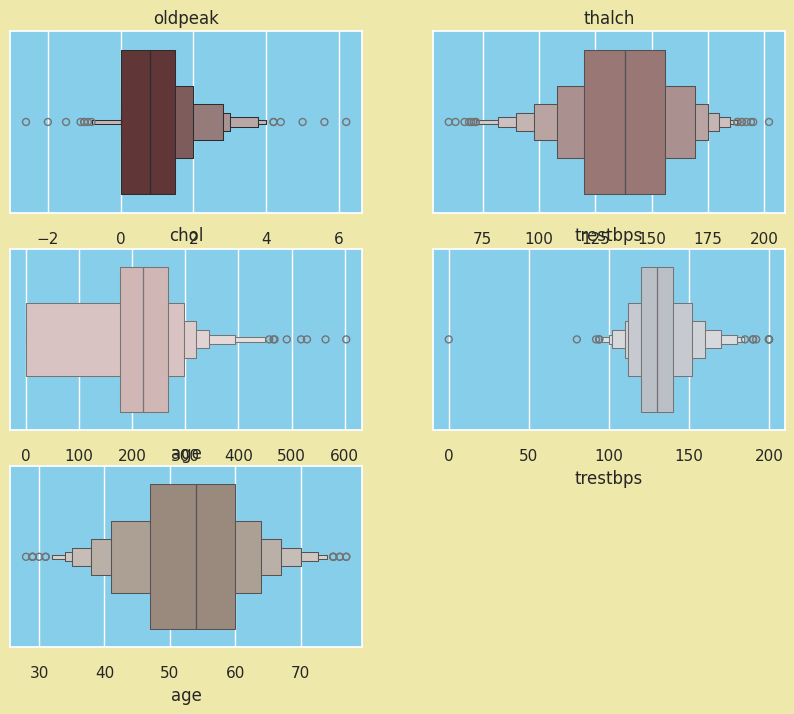

In [40]:
print("_________________________________________________________________________________________________________________________________________________")

sns.set(rc={"axes.facecolor":"#87CEEB","figure.facecolor":"#EEE8AA"})  # Change figure background color

palette = ["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"]
cmap = ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])

plt.figure(figsize=(10,8))

for i, col in enumerate(numerical_cols):
    plt.subplot(3,2, i+1)
    sns.boxenplot(x=df[col], color=palette[i % len(palette)])  # Use modulo to cycle through colors
    plt.title(col)

plt.show()
##E6E6FA

# `Machine Learning Models`

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  920 non-null    float64
 6   chol      920 non-null    float64
 7   fbs       920 non-null    object 
 8   restecg   920 non-null    object 
 9   thalch    920 non-null    float64
 10  exang     920 non-null    object 
 11  oldpeak   920 non-null    float64
 12  slope     920 non-null    object 
 13  ca        920 non-null    float64
 14  thal      920 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [44]:
df.columns

Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

In [45]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


The Targeted column is `num` which is the predicted attribute. We will use this column to predict the heart disease.
The unique values in this column are: [0,1,2,3,4], which states that there are 5 types of heart diseases.

* `0 = no heart disease.`
* `1 = Mild Heart Disease types.`
* `2 = Moderate Heart Disease type.`
* `3 =  Severe Heart Disease type.`
* `4 =  Critical Heart Disease type.`

In [46]:
# split the data into X and y
X= df.drop('num', axis=1)
y = df['num']

"""encode X data using separate label encoder for all categorical columns and save it for inverse transform"""
# Task: Separate Encoder for all categorical and object columns and inverse transform at the end.
Label_Encoder = LabelEncoder()

for col in X.columns:
    if X[col].dtype == 'object' or X[col].dtype == 'category':
        X[col] = Label_Encoder.fit_transform(X[col])
    else:
        pass


# split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)



Models
- logistic regression.
- KNN
- NB
- SVM
- Decision Tree
- Random Forest
- XGBoost
- GradientBoosting
- AdaBoost
- lightGBM

In [47]:
# improt ALl models.
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.naive_bayes import GaussianNB

#importing pipeline
from sklearn.pipeline import Pipeline

# import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_absolute_error, mean_squared_error




`Create a function for models and evaluate them`

In [48]:
import warnings
warnings.filterwarnings('ignore')





In [49]:
# create a list of models to evaluate

models = [
    ('Logistic Regression', LogisticRegression(random_state=42)),
    ('Gradient Boosting', GradientBoostingClassifier(random_state=42)),
    ('KNeighbors Classifier', KNeighborsClassifier()),
    ('Decision Tree Classifier', DecisionTreeClassifier(random_state=42)),
    ('AdaBoost Classifier', AdaBoostClassifier(random_state=42)),
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('XGboost Classifier', XGBClassifier(random_state=42)),

    ('Support Vector Machine', SVC(random_state=42)),

    ('Naye base Classifier', GaussianNB())


]

best_model = None
best_accuracy = 0.0

#Iterate over the models and evaluate their performance
for name, model in models:
    #create a pipeline for each model
    pipeline = Pipeline([
        # ('imputer', SimpleImputer(strategy='most_frequent)),
        #('encoder', OneHotEncoder(handle_unknow='ignore'))
        ('model', model)
    ])

    # perform cross validation
    scores = cross_val_score(pipeline, X_train, y_train, cv=5)

    # Calculate mean accuracy
    mean_accuracy = scores.mean()

    #fit the pipeline on the training data
    pipeline.fit(X_train, y_train)

    # make prediction on the test data
    y_pred = pipeline.predict(X_test)

    #Calculate accuracy score
    accuracy = accuracy_score(y_test, y_pred)

    #print the performance metrics
    print("Model", name)
    print("Cross Validatino accuracy: ", mean_accuracy)
    print("Test Accuracy: ", accuracy)
    print()

    #Check if the current model has the best accuracy
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = pipeline

# Retrieve the best model
print("Best Model: ", best_model)





Model Logistic Regression
Cross Validatino accuracy:  0.5108287696239504
Test Accuracy:  0.45652173913043476

Model Gradient Boosting
Cross Validatino accuracy:  0.6195618838992333
Test Accuracy:  0.5652173913043478

Model KNeighbors Classifier
Cross Validatino accuracy:  0.5857539247900694
Test Accuracy:  0.5543478260869565

Model Decision Tree Classifier
Cross Validatino accuracy:  0.5990069368382621
Test Accuracy:  0.532608695652174

Model AdaBoost Classifier
Cross Validatino accuracy:  0.5821321650237313
Test Accuracy:  0.5217391304347826

Model Random Forest
Cross Validatino accuracy:  0.6558378970427163
Test Accuracy:  0.6413043478260869

Model XGboost Classifier
Cross Validatino accuracy:  0.6219861263234757
Test Accuracy:  0.6086956521739131

Model Support Vector Machine
Cross Validatino accuracy:  0.5978167214311793
Test Accuracy:  0.5

Model Naye base Classifier
Cross Validatino accuracy:  0.5675721066082511
Test Accuracy:  0.4891304347826087

Best Model:  Pipeline(steps=[('m

# `Evaluation of Models`

In [50]:
categorical_cols = ['thal', 'ca', 'slope', 'exang', 'restecg','fbs', 'cp', 'sex']

In [51]:
def evaluate_classification_models(X, y, categorical_columns):
    # Encode categorical columns
    X_encoded = X.copy()
    label_encoders = {}
    for col in categorical_columns:
        label_encoders[col] = LabelEncoder()
        X_encoded[col] = label_encoders[col].fit_transform(X[col])

    # Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

    # Define models
    models = {
        "Logistic Regression": LogisticRegression(),
        "KNN": KNeighborsClassifier(),
        "NB": GaussianNB(),
        "SVM": SVC(),
        "Decision Tree": DecisionTreeClassifier(),
        "Random Forest": RandomForestClassifier(),
        "XGBoost": XGBClassifier(),
        "GradientBoosting": GradientBoostingClassifier(),
        "AdaBoost": AdaBoostClassifier()
    }

    # Train and evaluate models
    results = {}
    best_model = None
    best_accuracy = 0.0
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        results[name] = accuracy
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_model = name

    return results, best_model

# Example usage:
results, best_model = evaluate_classification_models(X, y, categorical_cols)
print("Model accuracies:", results)
print("Best model:", best_model)


Model accuracies: {'Logistic Regression': 0.5, 'KNN': 0.532608695652174, 'NB': 0.5434782608695652, 'SVM': 0.5597826086956522, 'Decision Tree': 0.592391304347826, 'Random Forest': 0.5978260869565217, 'XGBoost': 0.6304347826086957, 'GradientBoosting': 0.6195652173913043, 'AdaBoost': 0.5869565217391305}
Best model: XGBoost


In [55]:

# Assume df is your original DataFrame containing the dataset
# Extract your categorical columns for encoding
categorical_cols = ['sex', 'cp', 'dataset', 'restecg', 'slope', 'thal']  # Add other categorical columns as needed
X = df[categorical_cols]  # Select the categorical columns as input features
y = df['num']  # Select the target column

# Encode categorical columns outside the function
X_encoded = X.copy()
label_encoders = {}
for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    X_encoded[col] = label_encoders[col].fit_transform(X[col])

def hyperparameter_tuning(X_encoded, y, models):
    # Define dictionary to store results
    results = {}

    # Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

    # Perform hyperparameter tuning for each model
    for model_name, model in models.items():
        # Define parameter grid for hyperparameter tuning
        param_grid = {}
        if model_name == 'Logistic Regression':
            param_grid = {'C': [0.1, 1, 10, 100]}
        elif model_name == 'KNN':
            param_grid = {'n_neighbors': [3, 5, 7, 9]}
        elif model_name == 'NB':
            param_grid = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6]}
        elif model_name == 'SVM':
            param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [0.1, 1, 10, 100]}
        elif model_name == 'Decision Tree':
            param_grid = {'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10]}
        elif model_name == 'Random Forest':
            param_grid = {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10]}
        elif model_name == 'XGBoost':
            param_grid = {'learning_rate': [0.01, 0.1, 0.2], 'n_estimators': [100, 200, 300], 'max_depth': [3, 5, 7]}
        elif model_name == 'GradientBoosting':
            param_grid = {'learning_rate': [0.01, 0.1, 0.2], 'n_estimators': [100, 200, 300], 'max_depth': [3, 5, 7]}
        elif model_name == 'AdaBoost':
            param_grid = {'learning_rate': [0.01, 0.1, 0.2], 'n_estimators': [50, 100, 200]}

        # Perform hyperparameter tuning using GridSearchCV
        grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
        grid_search.fit(X_train, y_train)

        # Get best hyperparameters and evaluate on test set
        best_params = grid_search.best_params_
        best_model = grid_search.best_estimator_
        y_pred = best_model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)

        # Store results in dictionary
        results[model_name] = {'best_params': best_params, 'accuracy': accuracy}

    return results

# Define models dictionary
models = {
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "NB": GaussianNB(),
    "SVM": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(),
    "GradientBoosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier()
}

# Example usage:
results = hyperparameter_tuning(X_encoded, y, models)

# Determine the best model based on accuracy
best_model_name = max(results, key=lambda x: results[x]['accuracy'])
best_model_params = results[best_model_name]['best_params']
print(f"Best Model: {best_model_name}, Best Hyperparameters: {best_model_params}")

# Train the best model on the full dataset for final predictions
final_model = models[best_model_name].set_params(**best_model_params)
final_model.fit(X_encoded, y)

# Predict on new data or the test set (you need to provide this new data)
# For example, if you have a new DataFrame `new_data` to predict:
# Note: Ensure that new_data has the same categorical columns
# new_data_encoded = new_data.copy()
# for col in categorical_cols:
#     new_data_encoded[col] = label_encoders[col].transform(new_data[col])

# predictions = final_model.predict(new_data_encoded)

# Output the predictions
# print("Predictions:", predictions)


Best Model: KNN, Best Hyperparameters: {'n_neighbors': 7}


KNeighborsClassifier(n_neighbors=7)

#### `Outputs:`
1. The minimum age to have a heart disease start from 28 years old.
2. Most of the people get heart disease at the age of 53 to 54 years.
3. Most of the males and females get are with heart disease at the age of 54 to 55 years.
4. Male percentage i the data: 78.91%
5. Female percentage in the data : 21.09%
6. Males are 274.23% more than female in the data.
7. We have the highest number of people from Clveland(304) and lowest from Switzerland (123).
   
   `***..Age vs Sex and origin..***`
   1. The highest number of female in this dataset are from Cleveland(97) and lowest are from VA Long Beach(6).
   2. The highest number of male are from Hungary(212) and lowest from Switzerland(113).
   
   `***..Chest pain according to Origins..***`
8. The high number of Typical angina, Asymptomatic and Non anginal chest pain is in the Cleveland while Atypical anigna is highly occured in Hungary.
9.  Lowest number of chest pain (Typical angina, Asymptomatic, Non anginal and Atypical angina)is happened in Switzerland as compare to other origins.
    
    `***..Chest pain according to Age..***`
10. The highest number of chest pain is happened is Asymtomatic Angina and the lowest number of cp is that happened is Typical Angina.
    1. The age in which highest number of `Typical Angina` happened is `62 to 63 years`.
    2. The age in which highest number of `Asymtomatic Angina` happened is `56 to 57 years`.
    3. The age in which highest number of `Non Anginal` happened is `54 to 55 years`.
    4. The age in which highest number of `Atypical Angina` happened is `54 to 55 years`.